In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img의 shape: (512, 512)
img[0,0]의 값: 0


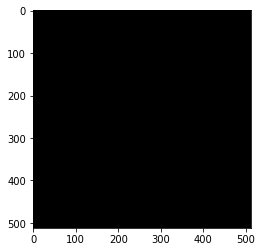

In [4]:
# 배열로 grayscale 영상 만들기

img = np.zeros(shape=(512,512), dtype=np.uint8)

print("img의 shape:", img.shape)
print("img[0,0]의 값:", img[0,0])

plt.imshow(img, cmap='gray', vmin=0, vmax=255)

img[0,0]의 값: 120


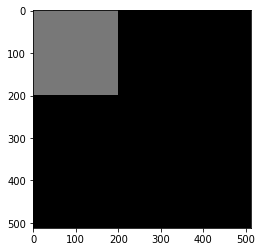

In [3]:
# 배열 값 수정하기

for i in range(0,200):
    for j in range(0,200):
        img[i, j] = 120

print("img[0,0]의 값:", img[0,0])
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

영상의 data type: uint8
영상의 shape: (512, 512)
lena_gray[0,0]의 값: 143


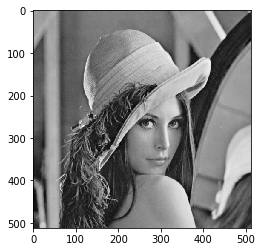

In [6]:
# 흑백 영상 shape 확인, 출력

lena_gray = cv2.imread("./practice2/Lena_gray.jpg", cv2.IMREAD_GRAYSCALE)
#lena_gray = cv2.imread("./practice2/Lena_gray.jpg", 0)

print("영상의 data type:", lena_gray.dtype)
print("영상의 shape:", lena_gray.shape)
print("lena_gray[0,0]의 값:", lena_gray[0,0])

plt.imshow(lena_gray, cmap='gray')

img의 shape: (512, 512, 3)


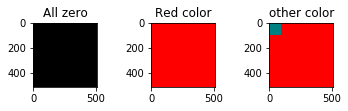

In [7]:
# 배열로 컬러 영상 만들기

img = np.zeros(shape=(512, 512, 3), dtype=np.uint8)
print("img의 shape:", img.shape)

plt.subplot(3,3,1) # 세 번째 인자는 번호판같이 배열  1, 2, 3 \n, 4, 5, 6 \n 7, 8, 9
plt.title("All zero")
plt.imshow(img)

for i in range(512):
    for j in range(512):
        img[i, j, 0] = 255 # R channel

plt.subplot(3, 3, 2)
plt.title("Red color")
plt.imshow(img)

for i in range(100):
    for j in range(100):
        img[i, j, 0] =  0 # R channel
        img[i, j, 1] = 128 # G channel
        img[i, j, 2] = 128 # B channel

plt.subplot(3, 3, 3)
plt.title("other color")
plt.imshow(img)

영상의 data type: uint8
영상의 shape: (512, 512, 3)
flowers_RGB[0,0]의 값: [39 54 11]


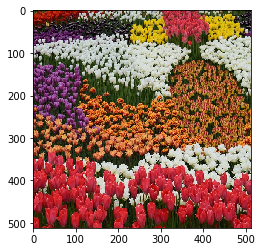

In [11]:
# 컬러 영상 shape 확인, 출력

flowers_RGB = cv2.imread("./practice2/Flowers.jpg", cv2.IMREAD_COLOR) # cv.2IMREAD_COLOR 은 생략 가능
flowers_RGB = cv2.cvtColor(flowers_RGB, cv2.COLOR_BGR2RGB)

print("영상의 data type:", flowers_RGB.dtype)
print("영상의 shape:", flowers_RGB.shape)
print("flowers_RGB[0,0]의 값:", flowers_RGB[0,0])

plt.imshow(flowers_RGB)

flowers_RGB의 shape: (512, 512, 3)
flowers_RGB(단일채널)의 shape: (512, 512)


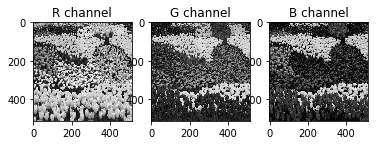

In [14]:
#컬러 영상 채널 별 출력(grayscale)

#RGB를 채널별로 출력 (grayscale)
flowers_R = flowers_RGB[:,:,0]
flowers_G = flowers_RGB[:,:,1]
flowers_B = flowers_RGB[:,:,2]

print("flowers_RGB의 shape:", flowers_RGB.shape)
print("flowers_RGB(단일채널)의 shape:", flowers_R.shape)

plt.figure()
plt.subplot(1,3,1)
plt.title("R channel")
plt.imshow(flowers_R, cmap='gray')

plt.subplot(1,3,2)
plt.title("G channel")
plt.imshow(flowers_G, cmap='gray')

plt.subplot(1,3,3)
plt.title("B channel")
plt.imshow(flowers_B, cmap='gray')

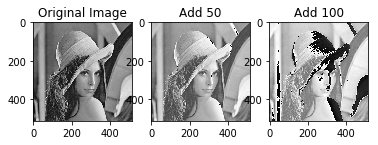

In [15]:
#grayscale 영상 더하기(overflow)

lena_gray = cv2.imread("./practice2/Lena_gray.jpg", cv2.IMREAD_GRAYSCALE)

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(lena_gray, cmap='gray')

h, w = lena_gray.shape
lena_add = np.zeros((h,w), np.uint8)

for i in range(h):
    for j in range(w):
        lena_add[i,j] = lena_gray[i,j] + 50
        
plt.subplot(1,3,2)
plt.title("Add 50")
plt.imshow(lena_add, cmap='gray')

# 위의 이중 for문과 같음
lena_add = lena_gray + 100

plt.subplot(1,3,3)
plt.title("Add 100")
plt.imshow(lena_add, cmap='gray')

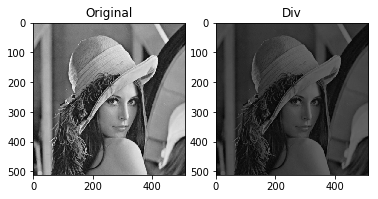

In [16]:
# grayscale 영상 나누기

#나누기
lena_div = lena_gray / 2

plt.figure()
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(lena_gray, cmap='gray')

plt.subplot(1,2,2)
plt.title("Div")
plt.imshow(lena_div, cmap='gray', vmin=0, vmax=255)

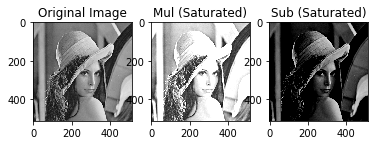

In [19]:
# grayscale 영상 밝기 변경(Saturated 또는 Clipping)

lena_gray = cv2.imread("./practice2/Lena_gray.jpg", cv2.IMREAD_GRAYSCALE)

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(lena_gray, cmap='gray')

lena_mul = np.int32(lena_gray) * 2
lena_mul[lena_mul > 255] = 255 # Overflow 현상이 일어나지 않게
lena_mul = np.uint8(lena_mul)

plt.subplot(1,3,2)
plt.title("Mul (Saturated)")
plt.imshow(lena_mul, cmap='gray')

lena_sub = np.int32(lena_gray) - 100
lena_sub[lena_sub < 0] = 0
lena_sub = np.uint8(lena_sub)

plt.subplot(1,3,3)
plt.title("Sub (Saturated)")
plt.imshow(lena_sub, cmap='gray')

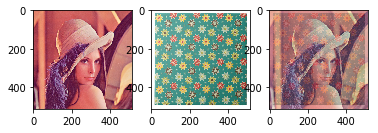

In [23]:
# 두 영상의 합성

lena = cv2.imread("./practice2/lena_color.jpg")
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

pattern = cv2.imread("./practice2/Pattern1.png")
pattern = cv2.cvtColor(pattern, cv2.COLOR_BGR2RGB)

alpha = 0.7 # alpha값을 자유롭게 조절
beta = 1 - alpha
mixed = (alpha * lena) + (beta * pattern)
mixed = np.uint8(mixed)

plt.subplot(1,3,1)
plt.imshow(lena)
plt.subplot(1,3,2)
plt.imshow(pattern)
plt.subplot(1,3,3)
plt.imshow(mixed)

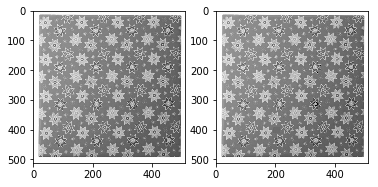

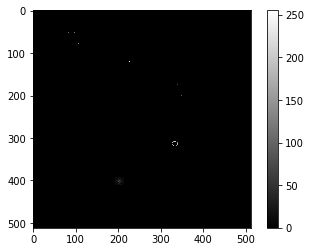

In [24]:
# 두 영상의 차

img1 = cv2.imread("./practice2/Pattern1.png", 0)
img2 = cv2.imread("./practice2/Pattern2.png", 0)

img_diff = np.abs(img1 - img2)

plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

plt.figure()
plt.imshow(img_diff, cmap='gray', vmin=0, vmax=255)
plt.colorbar()

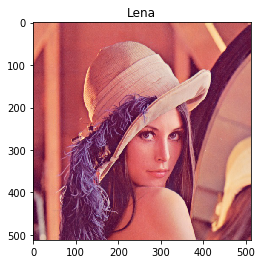

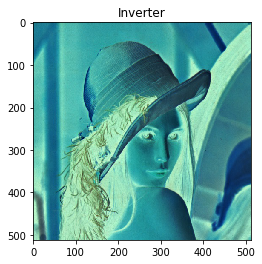

In [15]:
#영상 반전

lena = cv2.imread("./practice2/Lena_color.jpg")
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

plt.title("Lena")
plt.imshow(lena)

#lena_inverted = 255 - lena
lena_inverted = lena

for i in range(0,512):
    for j in range(0, 512):
        lena_inverted[i, j] = 255 - lena[i, j]

plt.figure()
plt.title("Inverter")
plt.imshow(lena_inverted)